In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_rows=10000

1.EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [183]:
df = pd.read_csv("cars-dataset.csv")

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [185]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [186]:
df.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [187]:
# check columns 'hp'
# hp = df['hp'].astype('int64') - When trying to convert to int, invalid literal for int() with base 10: '?'
missing_index = df[df["hp"]=='?'].index # This will be later used to check what value has been used for missing data
df[df["hp"]=='?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [188]:
# convert ? to NaN 
df["hp"] = df["hp"].replace(to_replace = "?", value = np.nan)

In [189]:
# Change hp to int type
df["hp"] = df['hp'].astype('float64')

In [190]:
# check correlation of hp from other variable to replace ?
df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.804203
hp,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
wt,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,1.000000


> hp has high correlation with disp,wt, cyl and mpg so we can use it to predict missing values

In [191]:
# drop car name as it is not required
df.drop(labels=["car name"],axis=1,inplace=True)

In [309]:
# use linear regression to predict missing values
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df[["cyl","disp","wt","mpg"]][df["hp"].notnull()]
y = df["hp"][df["hp"].notnull()]
lr.fit(X,y)
print (lr.intercept_, lr.coef_)
print ("Varience of Model : %.2f" %np.sqrt(mse(y,lr.predict(X))))
print ("Standard Deviation of Dependent Variable: %.2f" % y.std())

61.19371524913286 [-3.10389972  0.29105088  0.00635061 -0.64992521]
Varience of Model : 16.29
Standard Deviation of Dependent Variable: 38.35


> Variance of model is within accepatble range and can be used to predict missing values

In [199]:
# predict missing values
df["hp"][df["hp"].isnull()]=lr.predict(df[["cyl","disp","wt","mpg"]][df["hp"].isnull()]).astype('int64')

/var/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [200]:
# check values predicted for missing data 
df.loc[missing_index,:]

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,74.0,2046,19.0,71,25.0
126,6,200.0,105.0,2875,17.0,74,21.0
330,4,85.0,58.0,1835,17.3,80,40.9
336,4,140.0,92.0,2905,14.3,80,23.6
354,4,100.0,70.0,2320,15.8,81,34.5
374,4,151.0,97.0,3035,20.5,82,23.0


2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

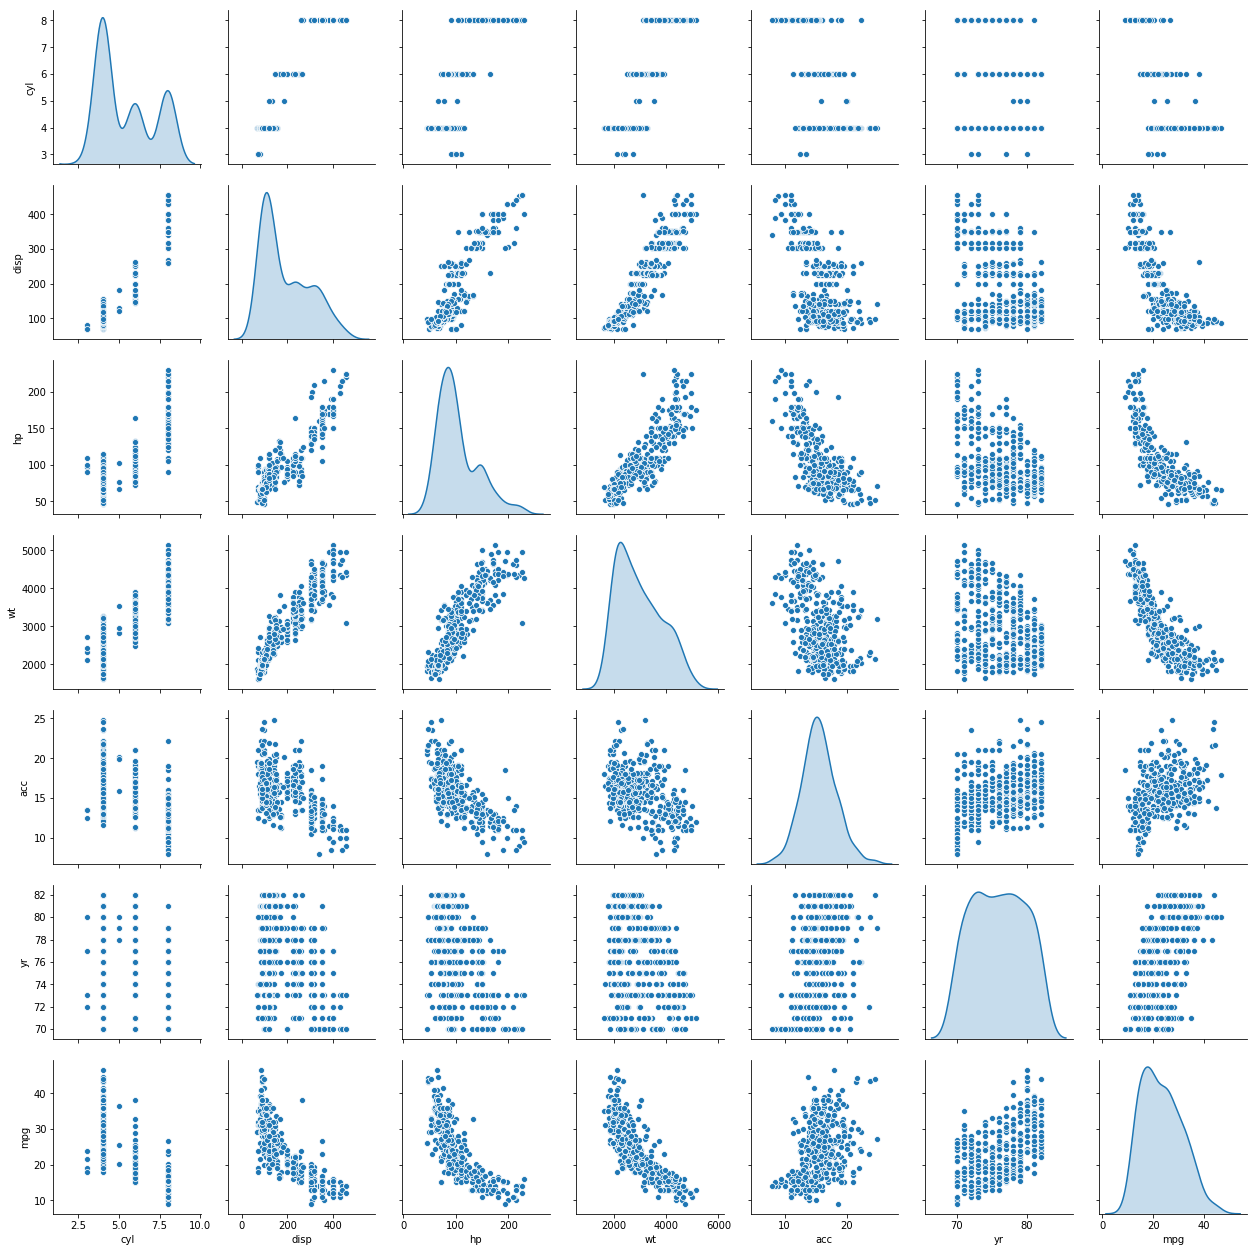

In [201]:
sns.pairplot(df,diag_kind='kde')

> The pair plot suggestes there should be 3 or greater clusters

> yr doesnt seem to have  strong relation with any of the variables - nor there is any clear clusters visible

> wt, disp and hp have strong correlation among themselves

> cyl clearly has 3 clusters

> disp, hp, wt is -vly related with mpg

> mgp and acc dsnt seems to have any collinarity



3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [205]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from scipy.stats import zscore

In [206]:
#preprocessing
df_z = df.apply(zscore)

In [207]:
cluster_range = range(2,10)
cluster_errors = []
for k in cluster_range:
    clusters = KMeans(n_clusters=k,n_init=5)
    clusters.fit(df_z)
    labels=clusters.labels_
    centriods = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_)
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,1294.938514
1,3,945.341522
2,4,737.616877
3,5,667.386364
4,6,598.109151
5,7,540.217328
6,8,500.650950
7,9,453.038265


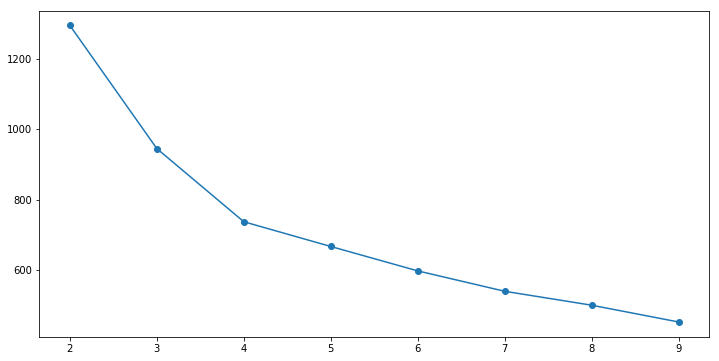

In [208]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [209]:
# from the above elbow graph it looks like there are 4 clusters

In [327]:
k=4
clusters = KMeans(n_clusters=k,n_init=5)
clusters.fit(df_z)
labels=clusters.labels_

In [328]:
df["c_labels"] = labels

In [329]:
df.groupby(by="c_labels").count()

,cyl,disp,hp,wt,acc,yr,mpg
c_labels,,,,,,,
0,113,113,113,113,113,113,113
1,94,94,94,94,94,94,94
2,91,91,91,91,91,91,91
3,100,100,100,100,100,100,100


/var/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/var/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


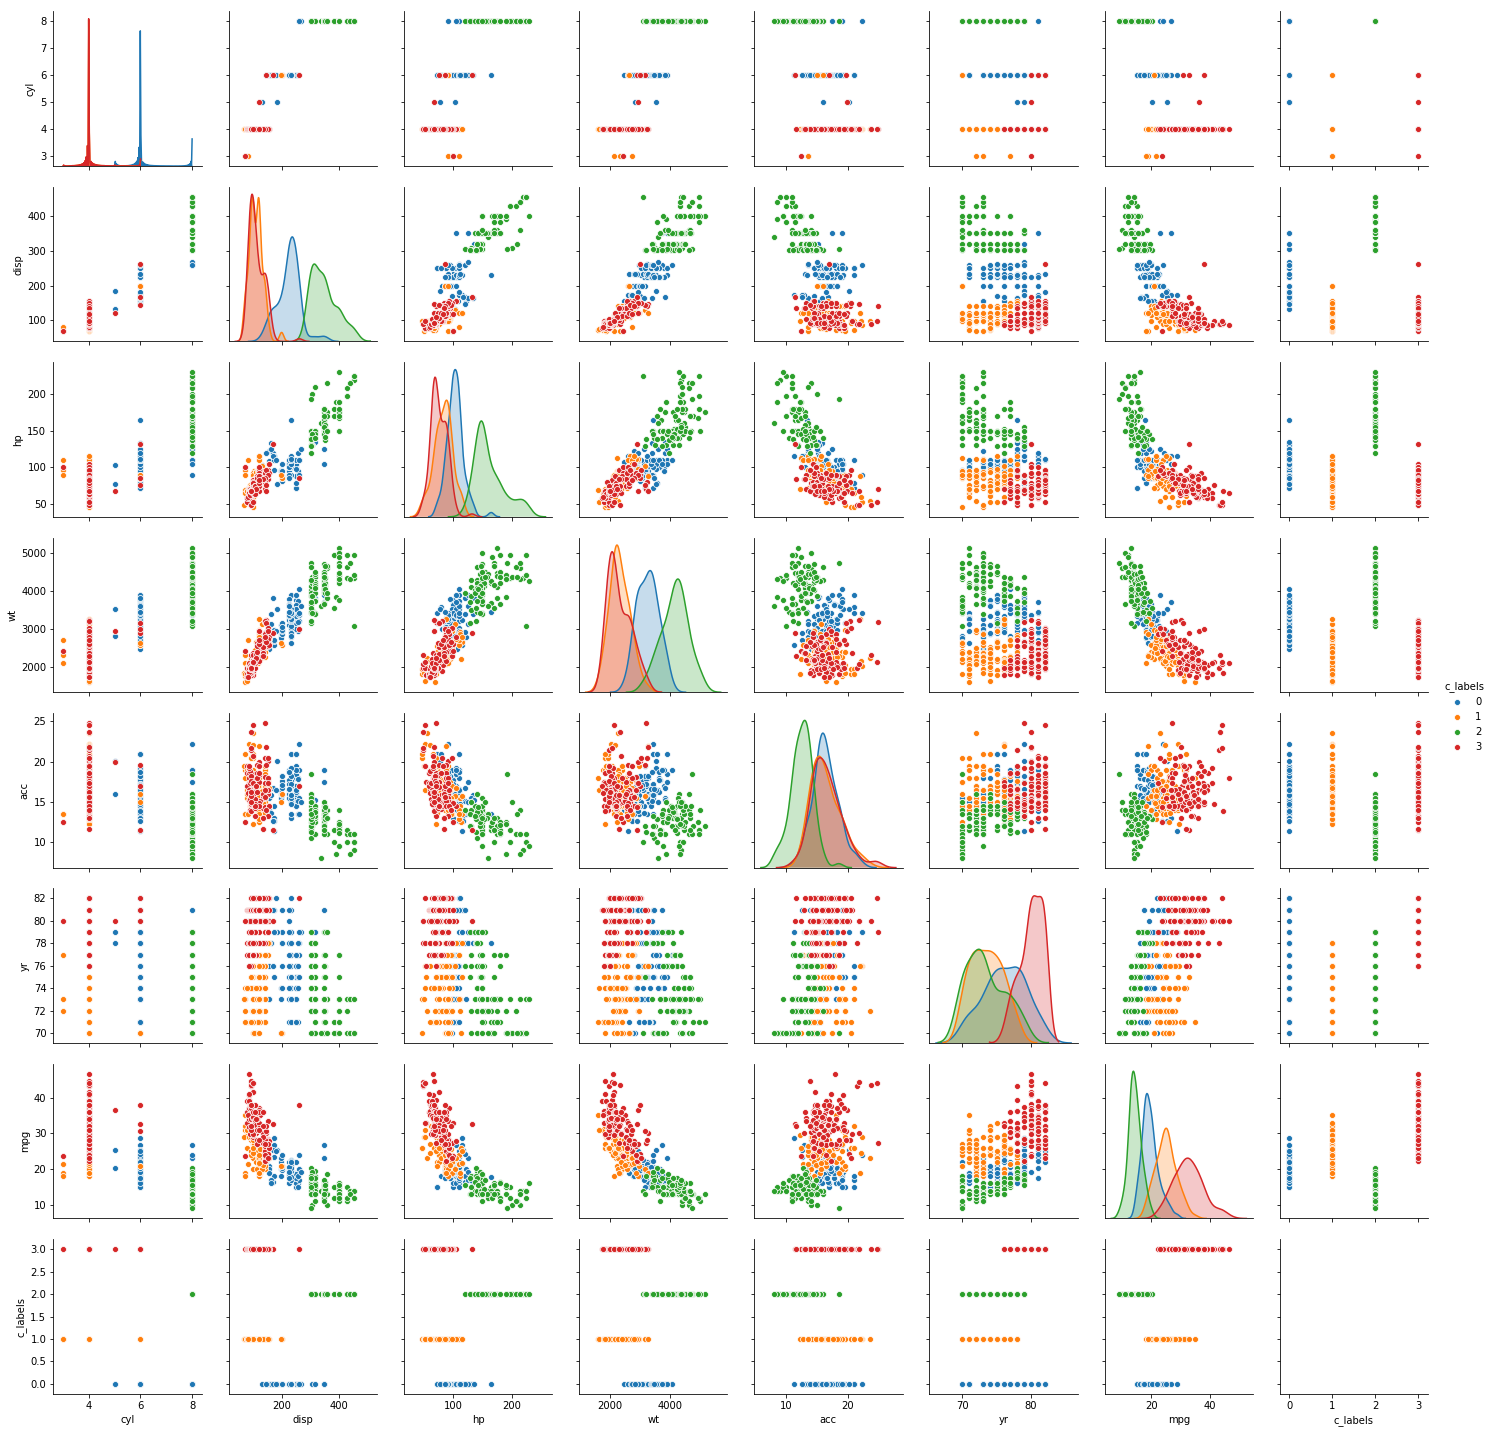

In [228]:
sns.pairplot(df,diag_kind='kde',hue='c_labels')

#### Use Hierarchical clustering to verify number of idea clusters

In [229]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [233]:
Z = linkage(df, 'average')
c, coph_dists = cophenet(Z , pdist(df))
c

0.778290038157542

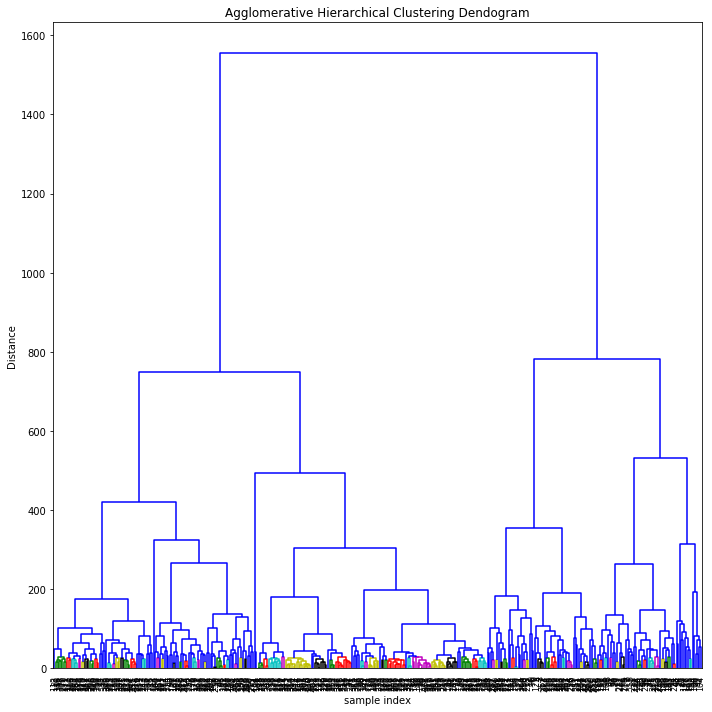

In [234]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

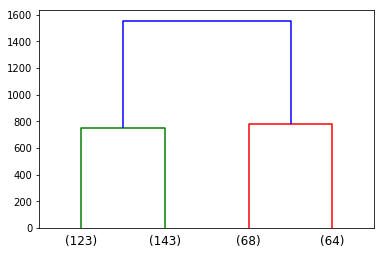

In [235]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

#### There are 4 natural clusters

## Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [280]:
k=4
clusters = KMeans(n_clusters=k,n_init=5)
clusters.fit(df_z)
labels=clusters.labels_
df["c_labels"] = labels

In [326]:
lr = LinearRegression()
lm = pd.DataFrame(columns=["Intercept","cyl","disp","hp","wt","acc","yr"])
ls_intercept = []
ls_coff = []
ls_score = []
ls_std = []
labels = range (0,k)
for label in labels:
    X = df[df['c_labels']==label]
    X.drop(labels='c_labels',axis=1,inplace=True)
    y = X.pop("mpg")
    lr.fit(X,y)
    ls_intercept.append(lr.intercept_)
    ls_coff.append(lr.coef_)
    ls_score.append(np.sqrt(mse(y,lr.predict(X))))
    ls_std.append(y.std())
    
lm_df = pd.DataFrame(data = ls_coff,columns=["cyl","disp","hp","wt","acc","yr"])
lm_df["Intercept"] = ls_intercept
lm_df["RMSE"] = ls_score
lm_df["STDev"] = ls_std
lm_df["R"] = lm_df["RMSE"]/lm_df["STDev"]
lm_df.index.name = "Label"
lm_df

/var/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,cyl,disp,hp,wt,acc,yr,Intercept,RMSE,STDev,R
Label,,,,,,,,,,
0,0.000000,-0.005642,-0.019024,-0.001100,-0.519310,0.383231,2.445147,1.410125,2.143900,0.657738
1,4.764096,-0.009562,-0.105943,-0.007328,0.175840,0.708631,-20.168229,3.279982,5.021992,0.653124
2,0.844624,-0.001274,-0.028058,-0.003747,-0.161968,0.483245,-4.341520,2.023165,2.807233,0.720697
3,3.912011,-0.049672,-0.040624,-0.004974,-0.235206,0.318131,10.315726,2.216581,3.522130,0.629330
